In [106]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from os import path
import warnings
warnings.filterwarnings('ignore')

In [37]:
%matplotlib inline

In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **2. Gathering and Observing Data**

In [39]:
df_ = pd.read_csv("../melbourne_house/Melbourne_housing_FULL.csv")
df = df_.copy()
df.head()

Suburb             Address  Rooms Type       Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h         NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h 1480000.000      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h 1035000.000      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u         NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h 1465000.000     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom   Car  Landsize  BuildingArea  \
0  3/09/2016     2.500  3067.000  ...     1.000 1.000   126.000           NaN   
1  3/12/2016     2.500  3067.000  ...     1.000 1.000   202.000           NaN   
2  4/02/2016     2.500  3067.000  ...     1.000 0.000   156.000        79.000   
3  4/02/2016     2.500  3067.000  ...     2.000 1.000     0.000           NaN   
4  4/03/2017     2.500  3067.000  ...     2.000 0.000   134.000       150.000   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council   -37.801     144.996  Northern Metropolitan   
1        NaN  Yarra City Council   -37.800     144.998  Northern Metropolitan   
2   1900.000  Yarra City Council   -37.808     144.993  Northern Metropolitan   
3        NaN  Yarra City Council   -37.811     145.012  Northern Metropolitan   
4   1900.000  Yarra City Council   -37.809     144.994  Northern Metropolitan   

  Propertycount  
0      4019.000  
1      4019.000  
2      4019.000  
3      4019.000  
4      4019.000  

[5 rows x 21 columns]

In [40]:
# Find the shape, number of columns and size of the dataset
print(f"Shape: {df.shape}")
print(f"Size: {df.size}")
print(f"Number of Columns: {len(df.columns)}")

Shape: (34857, 21)
Size: 731997
Number of Columns: 21


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [42]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.shape

(34856, 21)

In [45]:
round((df.describe().T), 2)

count        mean        std       min        25%  \
Rooms         34856.000       3.030      0.970     1.000      2.000   
Price         27247.000 1050173.340 641467.130 85000.000 635000.000   
Distance      34855.000      11.180      6.790     0.000      6.400   
Postcode      34855.000    3116.060    109.030  3000.000   3051.000   
Bedroom2      26639.000       3.080      0.980     0.000      2.000   
Bathroom      26630.000       1.620      0.720     0.000      1.000   
Car           26128.000       1.730      1.010     0.000      1.000   
Landsize      23046.000     593.610   3398.920     0.000    224.000   
BuildingArea  13741.000     160.250    401.280     0.000    102.000   
YearBuilt     15550.000    1965.290     37.330  1196.000   1940.000   
Lattitude     26880.000     -37.810      0.090   -38.190    -37.860   
Longtitude    26880.000     145.000      0.120   144.420    144.930   
Propertycount 34853.000    7572.960   4428.130    83.000   4385.000   

                     50%         75%          max  
Rooms              3.000       4.000       16.000  
Price         870000.000 1295000.000 11200000.000  
Distance          10.300      14.000       48.100  
Postcode        3103.000    3156.000     3978.000  
Bedroom2           3.000       4.000       30.000  
Bathroom           2.000       2.000       12.000  
Car                2.000       2.000       26.000  
Landsize         521.000     670.000   433014.000  
BuildingArea     136.000     188.000    44515.000  
YearBuilt       1970.000    2000.000     2106.000  
Lattitude        -37.810     -37.750      -37.390  
Longtitude       145.010     145.070      145.530  
Propertycount   6763.000   10412.000    21650.000

In [46]:
df.dropna(subset = ['Price'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(27247, 21)

### **2.1 Object Columns To Category**


**The values of some variables are given as objects. At the same time, we observe
that there are also categorical values. This might give us trouble when examining the
dataset. Therefore, in such cases, we need to define the variables categorically.**

In [47]:
obj_cols = [col for col in df.select_dtypes(['object']).columns]
obj_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [48]:
for col in obj_cols:
    df[col] = df[col].astype('category')

In [49]:
print(df.select_dtypes(['category']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [50]:
cat_columns = [col for col in df.select_dtypes(['category']).columns]
num_columns = [col for col in df.select_dtypes(include=['int64', 'float64'])]

In [51]:
for column in cat_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])
for column in num_columns:
    df[column] = df[column].fillna(df[column].median())
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

### **2.3 Outlier Detection With IQR**

In [52]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [53]:
# Outliers in numerical columns like Landsize, BuildingArea will be detected and removed
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
df["Landsize"].dtypes

dtype('float64')

In [54]:
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(df["Landsize"])
idx2=find_outliers(df["BuildingArea"])
idx3=find_outliers(df["YearBuilt"])
a=df.loc[idx]
b=df.loc[idx2]
c=df.loc[idx3]
d=pd.concat([a,b,c],join="inner")
df.drop(d.index, inplace = True)
df.reset_index(drop=True,inplace=True)
(round((df.describe().T),2))

count        mean        std       min        25%  \
Rooms         26696.000       2.990      0.950     1.000      2.000   
Price         26696.000 1037745.040 627554.060 85000.000 631000.000   
Distance      26696.000      11.390      6.740     0.000      6.600   
Postcode      26696.000    3113.800    111.410  3000.000   3046.000   
Bedroom2      26696.000       3.040      0.830     0.000      3.000   
Bathroom      26696.000       1.450      0.660     0.000      1.000   
Car           26696.000       1.800      0.860     0.000      1.000   
Landsize      26696.000     511.480    430.480     0.000    367.000   
BuildingArea  26696.000     139.760     53.430     0.000    133.000   
YearBuilt     26696.000    1970.070     21.400  1895.000   1970.000   
Lattitude     26696.000     -37.810      0.080   -38.190    -37.840   
Longtitude    26696.000     145.000      0.110   144.420    144.950   
Propertycount 26696.000    7574.610   4502.280   121.000   4294.000   

                     50%         75%          max  
Rooms              3.000       4.000       16.000  
Price         861000.000 1276000.000 11200000.000  
Distance          10.500      14.000       48.100  
Postcode        3088.000    3153.000     3978.000  
Bedroom2           3.000       3.000       20.000  
Bathroom           1.000       2.000        9.000  
Car                2.000       2.000       18.000  
Landsize         512.000     593.000     9338.000  
BuildingArea     133.000     133.000      958.000  
YearBuilt       1970.000    1970.000     2019.000  
Lattitude        -37.800     -37.760      -37.400  
Longtitude       145.000     145.050      145.530  
Propertycount   6567.000   10412.000    21650.000

In [55]:
le = LabelEncoder()
for column in cat_columns:
    df[column] = le.fit_transform(df[column])

<Axes: xlabel='Price', ylabel='Count'>

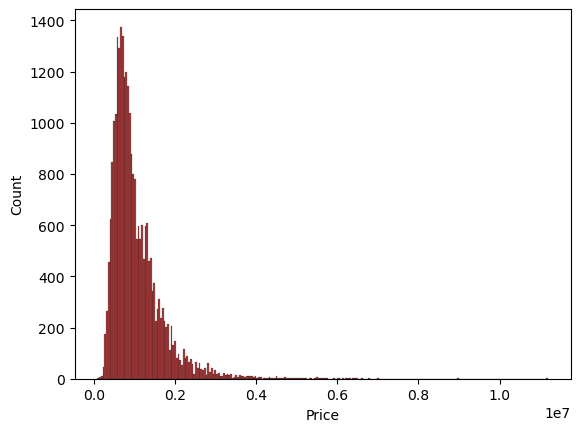

In [56]:
sns.histplot(df, x="Price",color="darkred")

In [57]:
X=df.drop(["Price","Address"],axis=1)
y=df["Price"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=30)

In [59]:
# Shape of training data
print("X_train shape: {}".format(X_train.shape))
# Shape of testing data
print("X_test shape: {}".format(X_test.shape))
# Shape of labels for training
print("y_train shape: {}".format(y_train.shape))
# Shape of labels for testing
print("y_test shape: {}".format(y_test.shape))

X_train shape: (20022, 19)
X_test shape: (6674, 19)
y_train shape: (20022,)
y_test shape: (6674,)


In [60]:
######################################################
#  Automated Hyperparameter Optimization
######################################################

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 6, 10],
             "n_estimators": [5,20,50,100]}

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}


lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "max_depth": [3, 5, 7],
                   "n_estimators": [100, 250, 500],
                   "colsample_bytree": [0.7, 1]}

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}


regressors = [ ("RF", RandomForestRegressor(), rf_params),
               ("GBM", GradientBoostingRegressor(), gbm_params),
               ("LightGBM", LGBMRegressor(), lightgbm_params),
               ("CatBoost", CatBoostRegressor(), catboost_params)
             ]

In [61]:
best_models = {}
best_models_params = {}

for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    cv_results = cross_validate(regressor, 
                                X_train, y_train, 
                                cv=5, 
                                scoring=['neg_mean_squared_error', 'r2']
                               )
    rmse = np.mean(np.sqrt(-cv_results['test_neg_mean_squared_error']))   
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
    
    r2 = cv_results["test_r2"].mean()
    print(f"R2 Score: {round(r2, 4)} ({name})")
    
    gs_best = GridSearchCV(regressor, param_grid=params,
                          cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)
    
    final_model = regressor.set_params(**gs_best.best_params_)
    cv_results = cross_validate(regressor, 
                                X_train, y_train, 
                                cv=5, 
                                scoring=['neg_mean_squared_error', 'r2']
                               )
    rmse = np.mean(np.sqrt(-cv_results['test_neg_mean_squared_error']))   
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")
    
    r2 = cv_results["test_r2"].mean()
    print(f"R2 Score (After): {round(r2, 4)} ({name})")
    
    best_models[name] = final_model
    best_models_params[name] = gs_best.best_params_

########## RF ##########
RMSE: 304538.0663 (RF) 
R2 Score: 0.7675 (RF)
RMSE (After): 294189.531 (RF) 
R2 Score (After): 0.783 (RF)
########## GBM ##########
RMSE: 325170.0121 (GBM) 
R2 Score: 0.7348 (GBM)
RMSE (After): 284946.4753 (GBM) 
R2 Score (After): 0.7964 (GBM)
########## LightGBM ##########
RMSE: 291974.2523 (LightGBM) 
R2 Score: 0.7863 (LightGBM)
RMSE (After): 284337.1639 (LightGBM) 
R2 Score (After): 0.7973 (LightGBM)
########## CatBoost ##########
Learning rate set to 0.06346
0:	learn: 610645.4201669	total: 158ms	remaining: 2m 37s
1:	learn: 590306.5266403	total: 173ms	remaining: 1m 26s
2:	learn: 571552.6285327	total: 188ms	remaining: 1m 2s
3:	learn: 554362.8673001	total: 203ms	remaining: 50.6s
4:	learn: 538093.9952859	total: 213ms	remaining: 42.4s
5:	learn: 522998.1769276	total: 220ms	remaining: 36.5s
6:	learn: 510309.4648897	total: 226ms	remaining: 32s
7:	learn: 497334.4572635	total: 230ms	remaining: 28.5s
8:	learn: 486146.2982425	total: 235ms	remaining: 25.8s
9:	learn: 475

196:	learn: 286142.4709958	total: 803ms	remaining: 3.27s
197:	learn: 285997.3136516	total: 806ms	remaining: 3.26s
198:	learn: 285726.1228788	total: 808ms	remaining: 3.25s
199:	learn: 285574.9584114	total: 811ms	remaining: 3.24s
200:	learn: 285319.2715350	total: 814ms	remaining: 3.23s
201:	learn: 285172.4595239	total: 816ms	remaining: 3.23s
202:	learn: 284914.2008876	total: 819ms	remaining: 3.22s
203:	learn: 284807.6310549	total: 822ms	remaining: 3.21s
204:	learn: 284602.5610643	total: 825ms	remaining: 3.2s
205:	learn: 284358.0164348	total: 827ms	remaining: 3.19s
206:	learn: 284024.8051204	total: 830ms	remaining: 3.18s
207:	learn: 283873.7878614	total: 833ms	remaining: 3.17s
208:	learn: 283631.8438162	total: 836ms	remaining: 3.16s
209:	learn: 283408.8410888	total: 838ms	remaining: 3.15s
210:	learn: 283385.8138287	total: 840ms	remaining: 3.14s
211:	learn: 283190.5199287	total: 843ms	remaining: 3.13s
212:	learn: 283004.1777939	total: 846ms	remaining: 3.13s
213:	learn: 282877.7481619	total

399:	learn: 254478.5181765	total: 1.39s	remaining: 2.09s
400:	learn: 254363.4958406	total: 1.4s	remaining: 2.09s
401:	learn: 254276.6926929	total: 1.4s	remaining: 2.08s
402:	learn: 254134.6499549	total: 1.4s	remaining: 2.08s
403:	learn: 254060.4086753	total: 1.41s	remaining: 2.08s
404:	learn: 253825.4512692	total: 1.41s	remaining: 2.07s
405:	learn: 253755.8135526	total: 1.41s	remaining: 2.07s
406:	learn: 253613.2942843	total: 1.42s	remaining: 2.06s
407:	learn: 253351.2758988	total: 1.42s	remaining: 2.06s
408:	learn: 253111.6404235	total: 1.42s	remaining: 2.05s
409:	learn: 253015.3095281	total: 1.42s	remaining: 2.05s
410:	learn: 252900.9086370	total: 1.43s	remaining: 2.04s
411:	learn: 252771.5394597	total: 1.43s	remaining: 2.04s
412:	learn: 252594.0330566	total: 1.43s	remaining: 2.04s
413:	learn: 252519.0289814	total: 1.44s	remaining: 2.03s
414:	learn: 252395.2438221	total: 1.44s	remaining: 2.03s
415:	learn: 252277.1132362	total: 1.44s	remaining: 2.02s
416:	learn: 252179.2292838	total: 

598:	learn: 235485.3350272	total: 1.99s	remaining: 1.33s
599:	learn: 235394.3707206	total: 2s	remaining: 1.33s
600:	learn: 235265.2376009	total: 2s	remaining: 1.33s
601:	learn: 235164.0831339	total: 2s	remaining: 1.32s
602:	learn: 235084.9129617	total: 2.01s	remaining: 1.32s
603:	learn: 234992.5046634	total: 2.01s	remaining: 1.32s
604:	learn: 234890.5549805	total: 2.01s	remaining: 1.31s
605:	learn: 234826.2200561	total: 2.02s	remaining: 1.31s
606:	learn: 234739.1410117	total: 2.02s	remaining: 1.31s
607:	learn: 234610.0216070	total: 2.02s	remaining: 1.3s
608:	learn: 234529.3167843	total: 2.02s	remaining: 1.3s
609:	learn: 234469.8902531	total: 2.03s	remaining: 1.3s
610:	learn: 234358.8179321	total: 2.03s	remaining: 1.29s
611:	learn: 234295.8673761	total: 2.03s	remaining: 1.29s
612:	learn: 234224.2393094	total: 2.04s	remaining: 1.29s
613:	learn: 234144.1199344	total: 2.04s	remaining: 1.28s
614:	learn: 234105.8122853	total: 2.04s	remaining: 1.28s
615:	learn: 234030.4174620	total: 2.05s	rem

798:	learn: 222505.9843488	total: 2.6s	remaining: 653ms
799:	learn: 222457.9376062	total: 2.6s	remaining: 650ms
800:	learn: 222340.6771140	total: 2.6s	remaining: 647ms
801:	learn: 222303.9316151	total: 2.6s	remaining: 643ms
802:	learn: 222242.8455162	total: 2.61s	remaining: 640ms
803:	learn: 222174.4887073	total: 2.61s	remaining: 637ms
804:	learn: 222088.8268712	total: 2.61s	remaining: 633ms
805:	learn: 222022.3826601	total: 2.62s	remaining: 630ms
806:	learn: 221950.2284762	total: 2.62s	remaining: 627ms
807:	learn: 221898.1204325	total: 2.63s	remaining: 624ms
808:	learn: 221844.3207636	total: 2.63s	remaining: 621ms
809:	learn: 221798.4231086	total: 2.63s	remaining: 617ms
810:	learn: 221755.5612425	total: 2.63s	remaining: 614ms
811:	learn: 221728.9286133	total: 2.64s	remaining: 611ms
812:	learn: 221710.4460542	total: 2.64s	remaining: 607ms
813:	learn: 221689.5313063	total: 2.64s	remaining: 604ms
814:	learn: 221625.2007347	total: 2.65s	remaining: 600ms
815:	learn: 221512.3947294	total: 2

986:	learn: 212679.3392074	total: 3.19s	remaining: 42.1ms
987:	learn: 212642.4181361	total: 3.2s	remaining: 38.9ms
988:	learn: 212604.6071219	total: 3.2s	remaining: 35.6ms
989:	learn: 212577.9444390	total: 3.2s	remaining: 32.4ms
990:	learn: 212515.9582908	total: 3.21s	remaining: 29.1ms
991:	learn: 212438.7090907	total: 3.21s	remaining: 25.9ms
992:	learn: 212363.5613512	total: 3.21s	remaining: 22.7ms
993:	learn: 212325.2517768	total: 3.22s	remaining: 19.4ms
994:	learn: 212281.5878491	total: 3.22s	remaining: 16.2ms
995:	learn: 212224.1477139	total: 3.22s	remaining: 12.9ms
996:	learn: 212222.3096637	total: 3.23s	remaining: 9.71ms
997:	learn: 212156.1669341	total: 3.23s	remaining: 6.47ms
998:	learn: 212076.6811173	total: 3.23s	remaining: 3.23ms
999:	learn: 212032.9867241	total: 3.23s	remaining: 0us
Learning rate set to 0.06346
0:	learn: 609563.9501571	total: 3.53ms	remaining: 3.53s
1:	learn: 589414.5920359	total: 6.71ms	remaining: 3.35s
2:	learn: 570887.2963563	total: 9.87ms	remaining: 3.2

198:	learn: 284355.2011325	total: 591ms	remaining: 2.38s
199:	learn: 284251.1888794	total: 594ms	remaining: 2.38s
200:	learn: 284018.3668368	total: 597ms	remaining: 2.37s
201:	learn: 283756.6611427	total: 600ms	remaining: 2.37s
202:	learn: 283542.1875944	total: 604ms	remaining: 2.37s
203:	learn: 283373.5803744	total: 608ms	remaining: 2.37s
204:	learn: 283058.0228646	total: 612ms	remaining: 2.37s
205:	learn: 282665.0699922	total: 615ms	remaining: 2.37s
206:	learn: 282395.7091487	total: 618ms	remaining: 2.37s
207:	learn: 282326.7363771	total: 622ms	remaining: 2.37s
208:	learn: 282206.9182408	total: 625ms	remaining: 2.37s
209:	learn: 281963.0814418	total: 629ms	remaining: 2.37s
210:	learn: 281763.7076825	total: 632ms	remaining: 2.36s
211:	learn: 281454.3980247	total: 636ms	remaining: 2.36s
212:	learn: 281183.4676517	total: 640ms	remaining: 2.36s
213:	learn: 280848.3510980	total: 643ms	remaining: 2.36s
214:	learn: 280563.4388670	total: 646ms	remaining: 2.36s
215:	learn: 280471.5241537	tota

370:	learn: 255803.4787091	total: 1.16s	remaining: 1.97s
371:	learn: 255771.0662286	total: 1.17s	remaining: 1.97s
372:	learn: 255681.7401756	total: 1.17s	remaining: 1.97s
373:	learn: 255535.6193350	total: 1.18s	remaining: 1.97s
374:	learn: 255381.0037359	total: 1.18s	remaining: 1.97s
375:	learn: 255278.4805977	total: 1.18s	remaining: 1.96s
376:	learn: 255106.8911732	total: 1.19s	remaining: 1.96s
377:	learn: 254997.3588875	total: 1.19s	remaining: 1.96s
378:	learn: 254775.8101995	total: 1.19s	remaining: 1.96s
379:	learn: 254635.3560228	total: 1.2s	remaining: 1.96s
380:	learn: 254498.8766303	total: 1.2s	remaining: 1.95s
381:	learn: 254408.2649055	total: 1.21s	remaining: 1.95s
382:	learn: 254220.6528055	total: 1.21s	remaining: 1.95s
383:	learn: 254120.5012924	total: 1.21s	remaining: 1.95s
384:	learn: 254059.2755282	total: 1.22s	remaining: 1.94s
385:	learn: 253943.6768212	total: 1.22s	remaining: 1.94s
386:	learn: 253847.1450503	total: 1.23s	remaining: 1.94s
387:	learn: 253743.3583308	total:

550:	learn: 237153.2738402	total: 1.76s	remaining: 1.43s
551:	learn: 237066.0959238	total: 1.76s	remaining: 1.43s
552:	learn: 236967.1608298	total: 1.76s	remaining: 1.43s
553:	learn: 236725.9643331	total: 1.77s	remaining: 1.42s
554:	learn: 236640.9700393	total: 1.77s	remaining: 1.42s
555:	learn: 236516.7626652	total: 1.77s	remaining: 1.42s
556:	learn: 236474.1183683	total: 1.77s	remaining: 1.41s
557:	learn: 236404.2878802	total: 1.78s	remaining: 1.41s
558:	learn: 236329.7377711	total: 1.78s	remaining: 1.41s
559:	learn: 236174.0753498	total: 1.78s	remaining: 1.4s
560:	learn: 236118.3226585	total: 1.79s	remaining: 1.4s
561:	learn: 236037.1544521	total: 1.79s	remaining: 1.39s
562:	learn: 235977.3216324	total: 1.79s	remaining: 1.39s
563:	learn: 235905.1299676	total: 1.79s	remaining: 1.39s
564:	learn: 235764.6056967	total: 1.8s	remaining: 1.38s
565:	learn: 235663.9835302	total: 1.8s	remaining: 1.38s
566:	learn: 235622.3333743	total: 1.8s	remaining: 1.38s
567:	learn: 235545.5135591	total: 1.

740:	learn: 223198.7944009	total: 2.36s	remaining: 824ms
741:	learn: 223140.3523425	total: 2.36s	remaining: 820ms
742:	learn: 223038.6565525	total: 2.36s	remaining: 817ms
743:	learn: 222976.7454083	total: 2.37s	remaining: 814ms
744:	learn: 222885.3222043	total: 2.37s	remaining: 811ms
745:	learn: 222805.2632255	total: 2.37s	remaining: 808ms
746:	learn: 222779.1066927	total: 2.38s	remaining: 805ms
747:	learn: 222749.5837616	total: 2.38s	remaining: 802ms
748:	learn: 222677.0584970	total: 2.38s	remaining: 799ms
749:	learn: 222589.4233828	total: 2.39s	remaining: 795ms
750:	learn: 222465.3698906	total: 2.39s	remaining: 792ms
751:	learn: 222414.2925759	total: 2.39s	remaining: 789ms
752:	learn: 222358.4641235	total: 2.4s	remaining: 786ms
753:	learn: 222276.3640894	total: 2.4s	remaining: 782ms
754:	learn: 222214.8747672	total: 2.4s	remaining: 779ms
755:	learn: 222171.8683111	total: 2.4s	remaining: 776ms
756:	learn: 222128.1634059	total: 2.41s	remaining: 773ms
757:	learn: 222058.1750833	total: 2

949:	learn: 212692.5016123	total: 2.96s	remaining: 156ms
950:	learn: 212640.5749617	total: 2.97s	remaining: 153ms
951:	learn: 212593.1803076	total: 2.97s	remaining: 150ms
952:	learn: 212561.4491651	total: 2.97s	remaining: 147ms
953:	learn: 212523.9397634	total: 2.98s	remaining: 144ms
954:	learn: 212477.9028202	total: 2.98s	remaining: 140ms
955:	learn: 212440.7561087	total: 2.98s	remaining: 137ms
956:	learn: 212389.8608107	total: 2.99s	remaining: 134ms
957:	learn: 212348.1233405	total: 2.99s	remaining: 131ms
958:	learn: 212309.5751979	total: 2.99s	remaining: 128ms
959:	learn: 212246.5112130	total: 2.99s	remaining: 125ms
960:	learn: 212234.0868651	total: 3s	remaining: 122ms
961:	learn: 212196.7507014	total: 3s	remaining: 119ms
962:	learn: 212141.9838307	total: 3s	remaining: 115ms
963:	learn: 212107.0862530	total: 3.01s	remaining: 112ms
964:	learn: 212081.5898707	total: 3.01s	remaining: 109ms
965:	learn: 212042.8704250	total: 3.01s	remaining: 106ms
966:	learn: 212035.6775834	total: 3.01s	

134:	learn: 299672.5375030	total: 408ms	remaining: 2.61s
135:	learn: 299282.8867733	total: 410ms	remaining: 2.61s
136:	learn: 299020.0437464	total: 413ms	remaining: 2.6s
137:	learn: 298666.0866906	total: 416ms	remaining: 2.6s
138:	learn: 298135.4152570	total: 419ms	remaining: 2.6s
139:	learn: 297653.3785568	total: 422ms	remaining: 2.59s
140:	learn: 297466.0908184	total: 425ms	remaining: 2.59s
141:	learn: 297203.6924764	total: 427ms	remaining: 2.58s
142:	learn: 296878.3613291	total: 430ms	remaining: 2.58s
143:	learn: 296465.0442992	total: 433ms	remaining: 2.58s
144:	learn: 296211.0870462	total: 436ms	remaining: 2.57s
145:	learn: 295809.4716744	total: 439ms	remaining: 2.57s
146:	learn: 295651.2568167	total: 442ms	remaining: 2.56s
147:	learn: 295485.8873963	total: 445ms	remaining: 2.56s
148:	learn: 295251.6311801	total: 448ms	remaining: 2.56s
149:	learn: 294966.3359654	total: 451ms	remaining: 2.55s
150:	learn: 294629.4096153	total: 454ms	remaining: 2.55s
151:	learn: 294400.6124761	total: 

337:	learn: 259319.6648168	total: 1s	remaining: 1.96s
338:	learn: 259243.1992349	total: 1s	remaining: 1.96s
339:	learn: 259123.3411160	total: 1.01s	remaining: 1.96s
340:	learn: 259042.8340236	total: 1.01s	remaining: 1.95s
341:	learn: 258861.8182965	total: 1.01s	remaining: 1.95s
342:	learn: 258776.6854307	total: 1.02s	remaining: 1.95s
343:	learn: 258720.0404835	total: 1.02s	remaining: 1.94s
344:	learn: 258642.7719235	total: 1.02s	remaining: 1.94s
345:	learn: 258583.2262580	total: 1.03s	remaining: 1.94s
346:	learn: 258483.9943418	total: 1.03s	remaining: 1.94s
347:	learn: 258277.0747277	total: 1.03s	remaining: 1.94s
348:	learn: 258188.4656153	total: 1.03s	remaining: 1.93s
349:	learn: 257998.9765333	total: 1.04s	remaining: 1.93s
350:	learn: 257840.8484407	total: 1.04s	remaining: 1.93s
351:	learn: 257739.9775899	total: 1.04s	remaining: 1.92s
352:	learn: 257649.1790085	total: 1.05s	remaining: 1.92s
353:	learn: 257527.5987815	total: 1.05s	remaining: 1.92s
354:	learn: 257387.5344675	total: 1.0

543:	learn: 238134.6200833	total: 1.6s	remaining: 1.34s
544:	learn: 238095.4798851	total: 1.6s	remaining: 1.34s
545:	learn: 238091.4240116	total: 1.61s	remaining: 1.34s
546:	learn: 238002.3503917	total: 1.61s	remaining: 1.33s
547:	learn: 237949.9727950	total: 1.61s	remaining: 1.33s
548:	learn: 237799.6894440	total: 1.61s	remaining: 1.33s
549:	learn: 237723.4793467	total: 1.62s	remaining: 1.32s
550:	learn: 237670.0776357	total: 1.62s	remaining: 1.32s
551:	learn: 237558.4198776	total: 1.62s	remaining: 1.32s
552:	learn: 237465.9030421	total: 1.63s	remaining: 1.31s
553:	learn: 237385.1503948	total: 1.63s	remaining: 1.31s
554:	learn: 237324.8514700	total: 1.63s	remaining: 1.31s
555:	learn: 237242.7280800	total: 1.64s	remaining: 1.31s
556:	learn: 237154.5158597	total: 1.64s	remaining: 1.3s
557:	learn: 237051.2203848	total: 1.64s	remaining: 1.3s
558:	learn: 236996.3817568	total: 1.65s	remaining: 1.3s
559:	learn: 236854.5788866	total: 1.65s	remaining: 1.29s
560:	learn: 236803.7418682	total: 1.

739:	learn: 224901.1832670	total: 2.2s	remaining: 773ms
740:	learn: 224865.3540195	total: 2.2s	remaining: 770ms
741:	learn: 224725.2956552	total: 2.21s	remaining: 767ms
742:	learn: 224682.2306535	total: 2.21s	remaining: 765ms
743:	learn: 224601.2627503	total: 2.21s	remaining: 762ms
744:	learn: 224540.6664206	total: 2.22s	remaining: 759ms
745:	learn: 224509.6196225	total: 2.22s	remaining: 757ms
746:	learn: 224476.8666223	total: 2.23s	remaining: 754ms
747:	learn: 224421.1397755	total: 2.23s	remaining: 751ms
748:	learn: 224364.2636268	total: 2.23s	remaining: 748ms
749:	learn: 224288.2096866	total: 2.24s	remaining: 746ms
750:	learn: 224235.4424663	total: 2.24s	remaining: 743ms
751:	learn: 224113.0202626	total: 2.24s	remaining: 740ms
752:	learn: 223998.6991544	total: 2.25s	remaining: 737ms
753:	learn: 223969.5809613	total: 2.25s	remaining: 735ms
754:	learn: 223911.4946062	total: 2.25s	remaining: 732ms
755:	learn: 223833.4905291	total: 2.26s	remaining: 729ms
756:	learn: 223769.6930680	total:

932:	learn: 213724.8952151	total: 2.79s	remaining: 200ms
933:	learn: 213661.4983264	total: 2.79s	remaining: 197ms
934:	learn: 213622.3155480	total: 2.8s	remaining: 195ms
935:	learn: 213599.7511305	total: 2.8s	remaining: 192ms
936:	learn: 213559.7217831	total: 2.8s	remaining: 189ms
937:	learn: 213511.4052432	total: 2.81s	remaining: 186ms
938:	learn: 213479.6109680	total: 2.81s	remaining: 183ms
939:	learn: 213427.6376475	total: 2.81s	remaining: 180ms
940:	learn: 213378.8492219	total: 2.82s	remaining: 177ms
941:	learn: 213354.2862069	total: 2.82s	remaining: 174ms
942:	learn: 213315.3541337	total: 2.82s	remaining: 171ms
943:	learn: 213312.4856722	total: 2.82s	remaining: 168ms
944:	learn: 213239.4267408	total: 2.83s	remaining: 165ms
945:	learn: 213189.5655524	total: 2.83s	remaining: 162ms
946:	learn: 213096.5985352	total: 2.83s	remaining: 159ms
947:	learn: 213064.5528436	total: 2.84s	remaining: 156ms
948:	learn: 213025.3363837	total: 2.84s	remaining: 153ms
949:	learn: 212958.3672351	total: 

136:	learn: 298139.1569691	total: 407ms	remaining: 2.56s
137:	learn: 297691.9534905	total: 410ms	remaining: 2.56s
138:	learn: 297352.3944280	total: 412ms	remaining: 2.55s
139:	learn: 297176.4410243	total: 415ms	remaining: 2.55s
140:	learn: 296968.7820739	total: 418ms	remaining: 2.54s
141:	learn: 296771.9453471	total: 420ms	remaining: 2.54s
142:	learn: 296557.6123913	total: 423ms	remaining: 2.53s
143:	learn: 296315.7192309	total: 425ms	remaining: 2.53s
144:	learn: 296189.3193842	total: 428ms	remaining: 2.52s
145:	learn: 295942.2054665	total: 431ms	remaining: 2.52s
146:	learn: 295868.8109368	total: 434ms	remaining: 2.52s
147:	learn: 295664.1057681	total: 438ms	remaining: 2.52s
148:	learn: 295447.7950251	total: 442ms	remaining: 2.52s
149:	learn: 295205.6139280	total: 446ms	remaining: 2.52s
150:	learn: 294592.5301768	total: 449ms	remaining: 2.52s
151:	learn: 294154.6549942	total: 452ms	remaining: 2.52s
152:	learn: 294143.9356182	total: 454ms	remaining: 2.51s
153:	learn: 293780.3962835	tota

344:	learn: 260088.6732178	total: 1s	remaining: 1.91s
345:	learn: 260046.3212034	total: 1.01s	remaining: 1.9s
346:	learn: 259878.7023776	total: 1.01s	remaining: 1.9s
347:	learn: 259776.7680860	total: 1.01s	remaining: 1.9s
348:	learn: 259656.3955388	total: 1.01s	remaining: 1.89s
349:	learn: 259537.5853455	total: 1.02s	remaining: 1.89s
350:	learn: 259396.8869564	total: 1.02s	remaining: 1.89s
351:	learn: 259204.1433584	total: 1.02s	remaining: 1.89s
352:	learn: 259102.4028130	total: 1.03s	remaining: 1.88s
353:	learn: 258949.3984335	total: 1.03s	remaining: 1.88s
354:	learn: 258867.6266487	total: 1.03s	remaining: 1.88s
355:	learn: 258830.8899762	total: 1.04s	remaining: 1.88s
356:	learn: 258750.5078407	total: 1.04s	remaining: 1.87s
357:	learn: 258576.1392256	total: 1.04s	remaining: 1.87s
358:	learn: 258474.0511292	total: 1.05s	remaining: 1.87s
359:	learn: 258377.7065142	total: 1.05s	remaining: 1.86s
360:	learn: 258320.7571227	total: 1.05s	remaining: 1.86s
361:	learn: 258205.0860815	total: 1.0

545:	learn: 238262.4931619	total: 1.6s	remaining: 1.33s
546:	learn: 238203.9708111	total: 1.61s	remaining: 1.33s
547:	learn: 238134.1577463	total: 1.61s	remaining: 1.33s
548:	learn: 238046.8345809	total: 1.61s	remaining: 1.32s
549:	learn: 238006.8323496	total: 1.61s	remaining: 1.32s
550:	learn: 237879.2729377	total: 1.62s	remaining: 1.32s
551:	learn: 237795.4103234	total: 1.62s	remaining: 1.31s
552:	learn: 237713.8430122	total: 1.62s	remaining: 1.31s
553:	learn: 237603.0741473	total: 1.63s	remaining: 1.31s
554:	learn: 237538.1766482	total: 1.63s	remaining: 1.31s
555:	learn: 237435.7658232	total: 1.63s	remaining: 1.3s
556:	learn: 237376.6618268	total: 1.64s	remaining: 1.3s
557:	learn: 237313.3579127	total: 1.64s	remaining: 1.3s
558:	learn: 237221.0384076	total: 1.65s	remaining: 1.3s
559:	learn: 237135.5601701	total: 1.65s	remaining: 1.3s
560:	learn: 237051.6321188	total: 1.65s	remaining: 1.29s
561:	learn: 236959.0381698	total: 1.66s	remaining: 1.29s
562:	learn: 236954.4305213	total: 1.6

747:	learn: 223885.8327299	total: 2.2s	remaining: 741ms
748:	learn: 223842.6282360	total: 2.2s	remaining: 738ms
749:	learn: 223712.7261301	total: 2.21s	remaining: 736ms
750:	learn: 223683.8606847	total: 2.21s	remaining: 733ms
751:	learn: 223670.5167531	total: 2.21s	remaining: 730ms
752:	learn: 223496.6198686	total: 2.22s	remaining: 727ms
753:	learn: 223429.9421389	total: 2.22s	remaining: 724ms
754:	learn: 223297.4172509	total: 2.22s	remaining: 721ms
755:	learn: 223288.7319835	total: 2.23s	remaining: 718ms
756:	learn: 223221.0707957	total: 2.23s	remaining: 715ms
757:	learn: 223176.8519647	total: 2.23s	remaining: 713ms
758:	learn: 223111.8668664	total: 2.23s	remaining: 710ms
759:	learn: 223059.1889623	total: 2.24s	remaining: 707ms
760:	learn: 222986.6411780	total: 2.24s	remaining: 704ms
761:	learn: 222925.2519912	total: 2.24s	remaining: 701ms
762:	learn: 222848.8222652	total: 2.25s	remaining: 698ms
763:	learn: 222829.9855444	total: 2.25s	remaining: 695ms
764:	learn: 222776.0313210	total:

928:	learn: 212930.3178231	total: 2.79s	remaining: 213ms
929:	learn: 212869.6800256	total: 2.8s	remaining: 210ms
930:	learn: 212842.9029016	total: 2.8s	remaining: 207ms
931:	learn: 212809.6617543	total: 2.8s	remaining: 204ms
932:	learn: 212804.0773604	total: 2.8s	remaining: 201ms
933:	learn: 212768.7805035	total: 2.81s	remaining: 198ms
934:	learn: 212698.3195909	total: 2.81s	remaining: 195ms
935:	learn: 212661.2467614	total: 2.81s	remaining: 192ms
936:	learn: 212601.1873722	total: 2.82s	remaining: 189ms
937:	learn: 212539.4780799	total: 2.82s	remaining: 186ms
938:	learn: 212459.8737171	total: 2.82s	remaining: 183ms
939:	learn: 212425.4822257	total: 2.83s	remaining: 180ms
940:	learn: 212368.7874613	total: 2.83s	remaining: 177ms
941:	learn: 212211.8075398	total: 2.83s	remaining: 174ms
942:	learn: 212162.9390996	total: 2.83s	remaining: 171ms
943:	learn: 212127.0534935	total: 2.84s	remaining: 168ms
944:	learn: 212069.8390157	total: 2.84s	remaining: 165ms
945:	learn: 212033.1033955	total: 2

130:	learn: 311124.2988735	total: 400ms	remaining: 2.65s
131:	learn: 310893.6652584	total: 404ms	remaining: 2.65s
132:	learn: 310556.8744330	total: 407ms	remaining: 2.65s
133:	learn: 310283.3221919	total: 411ms	remaining: 2.65s
134:	learn: 309843.5506878	total: 414ms	remaining: 2.65s
135:	learn: 309333.3304304	total: 418ms	remaining: 2.65s
136:	learn: 308953.2357448	total: 421ms	remaining: 2.65s
137:	learn: 308511.8551189	total: 425ms	remaining: 2.65s
138:	learn: 308134.8844721	total: 428ms	remaining: 2.65s
139:	learn: 307638.2833461	total: 432ms	remaining: 2.65s
140:	learn: 307409.5659741	total: 436ms	remaining: 2.65s
141:	learn: 307026.4337847	total: 439ms	remaining: 2.65s
142:	learn: 306562.2000538	total: 443ms	remaining: 2.65s
143:	learn: 306225.7289279	total: 447ms	remaining: 2.65s
144:	learn: 305904.6330319	total: 450ms	remaining: 2.65s
145:	learn: 305549.4540464	total: 453ms	remaining: 2.65s
146:	learn: 305353.8942052	total: 457ms	remaining: 2.65s
147:	learn: 305177.2621652	tota

322:	learn: 267651.5432189	total: 997ms	remaining: 2.09s
323:	learn: 267489.3872013	total: 1s	remaining: 2.09s
324:	learn: 267378.5945877	total: 1s	remaining: 2.08s
325:	learn: 267133.4144070	total: 1.01s	remaining: 2.08s
326:	learn: 266956.7719922	total: 1.01s	remaining: 2.08s
327:	learn: 266856.7661512	total: 1.01s	remaining: 2.07s
328:	learn: 266732.0213440	total: 1.01s	remaining: 2.07s
329:	learn: 266716.6464801	total: 1.02s	remaining: 2.07s
330:	learn: 266568.9320109	total: 1.02s	remaining: 2.06s
331:	learn: 266360.2012658	total: 1.02s	remaining: 2.06s
332:	learn: 266205.7088340	total: 1.03s	remaining: 2.06s
333:	learn: 266063.9437607	total: 1.03s	remaining: 2.05s
334:	learn: 265931.1102422	total: 1.03s	remaining: 2.05s
335:	learn: 265793.0254175	total: 1.03s	remaining: 2.05s
336:	learn: 265608.7678875	total: 1.04s	remaining: 2.04s
337:	learn: 265476.2856513	total: 1.04s	remaining: 2.04s
338:	learn: 265390.0366757	total: 1.04s	remaining: 2.04s
339:	learn: 265245.0189091	total: 1.0

526:	learn: 244112.7849702	total: 1.6s	remaining: 1.44s
527:	learn: 244036.9925802	total: 1.6s	remaining: 1.43s
528:	learn: 243962.2873174	total: 1.6s	remaining: 1.43s
529:	learn: 243863.1845692	total: 1.61s	remaining: 1.43s
530:	learn: 243732.6092015	total: 1.61s	remaining: 1.42s
531:	learn: 243706.6011069	total: 1.61s	remaining: 1.42s
532:	learn: 243649.4115912	total: 1.62s	remaining: 1.42s
533:	learn: 243622.9243963	total: 1.62s	remaining: 1.41s
534:	learn: 243542.9211847	total: 1.62s	remaining: 1.41s
535:	learn: 243439.5022442	total: 1.63s	remaining: 1.41s
536:	learn: 243294.7298461	total: 1.63s	remaining: 1.41s
537:	learn: 243213.6306016	total: 1.63s	remaining: 1.4s
538:	learn: 243160.2853780	total: 1.64s	remaining: 1.4s
539:	learn: 243152.5475810	total: 1.64s	remaining: 1.4s
540:	learn: 242947.8226461	total: 1.64s	remaining: 1.39s
541:	learn: 242871.7026418	total: 1.65s	remaining: 1.39s
542:	learn: 242784.6947184	total: 1.65s	remaining: 1.39s
543:	learn: 242688.1544250	total: 1.6

724:	learn: 229324.7081718	total: 2.2s	remaining: 834ms
725:	learn: 229272.4549601	total: 2.2s	remaining: 831ms
726:	learn: 229168.3508111	total: 2.21s	remaining: 828ms
727:	learn: 229092.4360318	total: 2.21s	remaining: 825ms
728:	learn: 228974.7746123	total: 2.21s	remaining: 822ms
729:	learn: 228937.8574237	total: 2.21s	remaining: 819ms
730:	learn: 228899.7417303	total: 2.22s	remaining: 816ms
731:	learn: 228799.3246125	total: 2.22s	remaining: 813ms
732:	learn: 228722.9508452	total: 2.22s	remaining: 810ms
733:	learn: 228646.5868621	total: 2.23s	remaining: 807ms
734:	learn: 228566.2398611	total: 2.23s	remaining: 804ms
735:	learn: 228551.8154956	total: 2.23s	remaining: 800ms
736:	learn: 228534.7404126	total: 2.23s	remaining: 797ms
737:	learn: 228477.5019500	total: 2.24s	remaining: 794ms
738:	learn: 228476.0163260	total: 2.24s	remaining: 791ms
739:	learn: 228388.4386284	total: 2.24s	remaining: 788ms
740:	learn: 228308.7943198	total: 2.25s	remaining: 785ms
741:	learn: 228270.6188335	total:

912:	learn: 217399.4291880	total: 2.8s	remaining: 267ms
913:	learn: 217361.0660719	total: 2.81s	remaining: 264ms
914:	learn: 217323.5167826	total: 2.81s	remaining: 261ms
915:	learn: 217281.6249475	total: 2.81s	remaining: 258ms
916:	learn: 217225.6314818	total: 2.82s	remaining: 255ms
917:	learn: 217163.6222295	total: 2.82s	remaining: 252ms
918:	learn: 217102.7948239	total: 2.82s	remaining: 249ms
919:	learn: 216945.7174210	total: 2.83s	remaining: 246ms
920:	learn: 216878.8653423	total: 2.83s	remaining: 243ms
921:	learn: 216857.1497682	total: 2.83s	remaining: 240ms
922:	learn: 216816.5173646	total: 2.83s	remaining: 236ms
923:	learn: 216754.9064938	total: 2.84s	remaining: 233ms
924:	learn: 216695.6762788	total: 2.84s	remaining: 230ms
925:	learn: 216635.0254685	total: 2.84s	remaining: 227ms
926:	learn: 216585.3767529	total: 2.85s	remaining: 224ms
927:	learn: 216573.7301187	total: 2.85s	remaining: 221ms
928:	learn: 216476.8673904	total: 2.85s	remaining: 218ms
929:	learn: 216424.4324235	total

60:	learn: 315599.3270458	total: 205ms	remaining: 1.48s
61:	learn: 315182.1281325	total: 209ms	remaining: 1.48s
62:	learn: 314961.6914875	total: 212ms	remaining: 1.47s
63:	learn: 314238.6749022	total: 215ms	remaining: 1.47s
64:	learn: 313777.9253611	total: 219ms	remaining: 1.46s
65:	learn: 313547.9970362	total: 222ms	remaining: 1.46s
66:	learn: 312907.8021129	total: 224ms	remaining: 1.45s
67:	learn: 312466.3949826	total: 228ms	remaining: 1.45s
68:	learn: 311694.9538361	total: 231ms	remaining: 1.44s
69:	learn: 311145.3346438	total: 235ms	remaining: 1.44s
70:	learn: 310556.2041898	total: 239ms	remaining: 1.44s
71:	learn: 310021.5360259	total: 242ms	remaining: 1.44s
72:	learn: 309641.8003312	total: 245ms	remaining: 1.43s
73:	learn: 309114.6693551	total: 248ms	remaining: 1.43s
74:	learn: 308731.0613785	total: 251ms	remaining: 1.42s
75:	learn: 308583.4660831	total: 254ms	remaining: 1.42s
76:	learn: 308024.1458934	total: 257ms	remaining: 1.41s
77:	learn: 307313.1097936	total: 260ms	remaining

258:	learn: 257053.3053824	total: 810ms	remaining: 753ms
259:	learn: 256938.4180267	total: 813ms	remaining: 750ms
260:	learn: 256667.4862777	total: 816ms	remaining: 747ms
261:	learn: 256508.6683827	total: 819ms	remaining: 744ms
262:	learn: 256383.5396280	total: 822ms	remaining: 740ms
263:	learn: 256155.2587993	total: 825ms	remaining: 737ms
264:	learn: 256019.7096961	total: 828ms	remaining: 734ms
265:	learn: 255839.5390506	total: 831ms	remaining: 731ms
266:	learn: 255714.6605082	total: 834ms	remaining: 728ms
267:	learn: 255507.0855335	total: 837ms	remaining: 724ms
268:	learn: 255334.1795722	total: 840ms	remaining: 722ms
269:	learn: 255174.9004919	total: 844ms	remaining: 719ms
270:	learn: 255102.9786732	total: 847ms	remaining: 716ms
271:	learn: 254906.0819014	total: 851ms	remaining: 713ms
272:	learn: 254672.9835621	total: 854ms	remaining: 710ms
273:	learn: 254256.7127667	total: 857ms	remaining: 707ms
274:	learn: 254035.4004622	total: 860ms	remaining: 703ms
275:	learn: 253879.8177623	tota

450:	learn: 231761.9077741	total: 1.41s	remaining: 153ms
451:	learn: 231736.5159370	total: 1.41s	remaining: 150ms
452:	learn: 231608.3706307	total: 1.42s	remaining: 147ms
453:	learn: 231542.6265291	total: 1.42s	remaining: 144ms
454:	learn: 231443.2108751	total: 1.42s	remaining: 141ms
455:	learn: 231342.4539910	total: 1.43s	remaining: 138ms
456:	learn: 231331.7773684	total: 1.43s	remaining: 134ms
457:	learn: 231294.0598903	total: 1.43s	remaining: 131ms
458:	learn: 231218.9696813	total: 1.44s	remaining: 128ms
459:	learn: 231102.0575236	total: 1.44s	remaining: 125ms
460:	learn: 231004.4447534	total: 1.44s	remaining: 122ms
461:	learn: 230932.2535773	total: 1.45s	remaining: 119ms
462:	learn: 230817.6491827	total: 1.45s	remaining: 116ms
463:	learn: 230708.2216544	total: 1.45s	remaining: 113ms
464:	learn: 230542.3371602	total: 1.45s	remaining: 109ms
465:	learn: 230464.8985028	total: 1.46s	remaining: 106ms
466:	learn: 230406.4727390	total: 1.46s	remaining: 103ms
467:	learn: 230377.4879342	tota

130:	learn: 284639.2463263	total: 404ms	remaining: 1.14s
131:	learn: 284498.5267515	total: 407ms	remaining: 1.13s
132:	learn: 284116.3344291	total: 410ms	remaining: 1.13s
133:	learn: 284013.7689109	total: 413ms	remaining: 1.13s
134:	learn: 283775.8995578	total: 415ms	remaining: 1.12s
135:	learn: 283417.8424507	total: 418ms	remaining: 1.12s
136:	learn: 283252.4812631	total: 421ms	remaining: 1.11s
137:	learn: 282797.0528677	total: 424ms	remaining: 1.11s
138:	learn: 282551.2641043	total: 427ms	remaining: 1.11s
139:	learn: 282150.6919195	total: 430ms	remaining: 1.11s
140:	learn: 281796.0488520	total: 433ms	remaining: 1.1s
141:	learn: 281505.9610908	total: 436ms	remaining: 1.1s
142:	learn: 281274.5094561	total: 438ms	remaining: 1.09s
143:	learn: 280980.6060243	total: 441ms	remaining: 1.09s
144:	learn: 280644.6644732	total: 444ms	remaining: 1.09s
145:	learn: 280223.4426618	total: 447ms	remaining: 1.08s
146:	learn: 279755.4405815	total: 449ms	remaining: 1.08s
147:	learn: 279551.8104561	total:

334:	learn: 241454.1283545	total: 1s	remaining: 494ms
335:	learn: 241206.2844514	total: 1.01s	remaining: 491ms
336:	learn: 241163.5527774	total: 1.01s	remaining: 488ms
337:	learn: 240997.4003659	total: 1.01s	remaining: 485ms
338:	learn: 240826.8113292	total: 1.01s	remaining: 482ms
339:	learn: 240629.6755624	total: 1.02s	remaining: 479ms
340:	learn: 240462.3414020	total: 1.02s	remaining: 476ms
341:	learn: 240419.7345072	total: 1.02s	remaining: 473ms
342:	learn: 240313.5676030	total: 1.02s	remaining: 470ms
343:	learn: 240236.5879518	total: 1.03s	remaining: 467ms
344:	learn: 240095.6383403	total: 1.03s	remaining: 464ms
345:	learn: 239925.3827921	total: 1.03s	remaining: 461ms
346:	learn: 239793.0618845	total: 1.04s	remaining: 457ms
347:	learn: 239755.2356944	total: 1.04s	remaining: 454ms
348:	learn: 239737.5361424	total: 1.04s	remaining: 451ms
349:	learn: 239661.4890826	total: 1.04s	remaining: 448ms
350:	learn: 239607.2950001	total: 1.05s	remaining: 445ms
351:	learn: 239509.9519968	total: 

0:	learn: 597354.7454771	total: 3.52ms	remaining: 1.76s
1:	learn: 567528.5032590	total: 6.83ms	remaining: 1.7s
2:	learn: 541814.5396933	total: 10.1ms	remaining: 1.67s
3:	learn: 519759.2971210	total: 13.2ms	remaining: 1.64s
4:	learn: 498718.4721252	total: 16.7ms	remaining: 1.65s
5:	learn: 481042.1647613	total: 20.2ms	remaining: 1.66s
6:	learn: 465713.6916397	total: 23.6ms	remaining: 1.66s
7:	learn: 450667.7787939	total: 26.9ms	remaining: 1.65s
8:	learn: 438353.5480451	total: 30.3ms	remaining: 1.65s
9:	learn: 427316.8090952	total: 33.7ms	remaining: 1.65s
10:	learn: 417984.5618488	total: 37.1ms	remaining: 1.65s
11:	learn: 409237.4290612	total: 40.5ms	remaining: 1.65s
12:	learn: 402241.6135620	total: 43.6ms	remaining: 1.63s
13:	learn: 394808.7937284	total: 47.1ms	remaining: 1.63s
14:	learn: 388242.1297980	total: 50.2ms	remaining: 1.62s
15:	learn: 383234.8417764	total: 53.2ms	remaining: 1.61s
16:	learn: 377804.5048507	total: 56.3ms	remaining: 1.6s
17:	learn: 372717.3344931	total: 59.6ms	rem

204:	learn: 262639.3280809	total: 611ms	remaining: 879ms
205:	learn: 262535.3585475	total: 614ms	remaining: 876ms
206:	learn: 262302.8916012	total: 617ms	remaining: 873ms
207:	learn: 262200.3769091	total: 619ms	remaining: 870ms
208:	learn: 261964.9379454	total: 622ms	remaining: 866ms
209:	learn: 261783.1411658	total: 625ms	remaining: 863ms
210:	learn: 261647.4415325	total: 628ms	remaining: 860ms
211:	learn: 261291.7101561	total: 631ms	remaining: 857ms
212:	learn: 261189.5070960	total: 635ms	remaining: 855ms
213:	learn: 260972.0808105	total: 638ms	remaining: 853ms
214:	learn: 260558.1340873	total: 642ms	remaining: 851ms
215:	learn: 260249.6858613	total: 645ms	remaining: 848ms
216:	learn: 260000.7873884	total: 648ms	remaining: 845ms
217:	learn: 259715.5030121	total: 650ms	remaining: 841ms
218:	learn: 259414.3065460	total: 653ms	remaining: 838ms
219:	learn: 258919.4931568	total: 656ms	remaining: 835ms
220:	learn: 258618.6324112	total: 659ms	remaining: 832ms
221:	learn: 258401.0018504	tota

408:	learn: 231070.2446365	total: 1.21s	remaining: 269ms
409:	learn: 230956.7878830	total: 1.21s	remaining: 267ms
410:	learn: 230807.1295235	total: 1.22s	remaining: 264ms
411:	learn: 230616.9489259	total: 1.22s	remaining: 261ms
412:	learn: 230458.5832816	total: 1.22s	remaining: 258ms
413:	learn: 230414.7178912	total: 1.23s	remaining: 255ms
414:	learn: 230227.1440616	total: 1.23s	remaining: 252ms
415:	learn: 230082.3158913	total: 1.23s	remaining: 249ms
416:	learn: 229984.7783833	total: 1.23s	remaining: 246ms
417:	learn: 229911.6607483	total: 1.24s	remaining: 243ms
418:	learn: 229836.3719746	total: 1.24s	remaining: 240ms
419:	learn: 229684.1254087	total: 1.24s	remaining: 237ms
420:	learn: 229584.6416406	total: 1.25s	remaining: 234ms
421:	learn: 229430.1382095	total: 1.25s	remaining: 231ms
422:	learn: 229296.3260640	total: 1.25s	remaining: 228ms
423:	learn: 229227.1937911	total: 1.25s	remaining: 225ms
424:	learn: 229142.6462614	total: 1.26s	remaining: 222ms
425:	learn: 229098.1698019	tota

62:	learn: 310971.9832906	total: 200ms	remaining: 1.39s
63:	learn: 310404.5454150	total: 203ms	remaining: 1.38s
64:	learn: 310008.2868956	total: 206ms	remaining: 1.38s
65:	learn: 309226.7035204	total: 209ms	remaining: 1.38s
66:	learn: 308837.7308758	total: 212ms	remaining: 1.37s
67:	learn: 308143.8457946	total: 215ms	remaining: 1.36s
68:	learn: 307655.8731380	total: 218ms	remaining: 1.36s
69:	learn: 307165.5621182	total: 221ms	remaining: 1.36s
70:	learn: 306613.6458894	total: 224ms	remaining: 1.35s
71:	learn: 306292.9341036	total: 226ms	remaining: 1.34s
72:	learn: 305785.3519659	total: 229ms	remaining: 1.34s
73:	learn: 305272.8756997	total: 232ms	remaining: 1.34s
74:	learn: 305032.0114927	total: 235ms	remaining: 1.33s
75:	learn: 304531.9642907	total: 238ms	remaining: 1.33s
76:	learn: 304128.5594606	total: 241ms	remaining: 1.32s
77:	learn: 303156.1168019	total: 243ms	remaining: 1.32s
78:	learn: 302790.1381866	total: 246ms	remaining: 1.31s
79:	learn: 302251.3996971	total: 250ms	remaining

225:	learn: 255423.2370394	total: 712ms	remaining: 864ms
226:	learn: 255258.4332771	total: 717ms	remaining: 862ms
227:	learn: 255164.8984137	total: 720ms	remaining: 858ms
228:	learn: 254987.8768837	total: 723ms	remaining: 855ms
229:	learn: 254855.6504429	total: 726ms	remaining: 852ms
230:	learn: 254719.5640485	total: 728ms	remaining: 848ms
231:	learn: 254601.4032748	total: 731ms	remaining: 844ms
232:	learn: 254451.2393087	total: 734ms	remaining: 841ms
233:	learn: 254298.5153150	total: 736ms	remaining: 837ms
234:	learn: 254184.8322170	total: 739ms	remaining: 834ms
235:	learn: 253979.1645973	total: 742ms	remaining: 830ms
236:	learn: 253788.9441637	total: 745ms	remaining: 827ms
237:	learn: 253695.4187697	total: 748ms	remaining: 823ms
238:	learn: 253607.0605983	total: 750ms	remaining: 820ms
239:	learn: 253363.7545323	total: 753ms	remaining: 816ms
240:	learn: 253211.0458019	total: 756ms	remaining: 812ms
241:	learn: 253186.8536263	total: 759ms	remaining: 809ms
242:	learn: 252953.5045152	tota

430:	learn: 228727.7615424	total: 1.31s	remaining: 210ms
431:	learn: 228556.4714937	total: 1.31s	remaining: 207ms
432:	learn: 228396.8653097	total: 1.32s	remaining: 204ms
433:	learn: 228321.2710605	total: 1.32s	remaining: 201ms
434:	learn: 228254.4655575	total: 1.32s	remaining: 198ms
435:	learn: 228170.5586505	total: 1.33s	remaining: 195ms
436:	learn: 228037.8015292	total: 1.33s	remaining: 192ms
437:	learn: 227829.7926108	total: 1.33s	remaining: 189ms
438:	learn: 227644.8600606	total: 1.33s	remaining: 186ms
439:	learn: 227480.1005533	total: 1.34s	remaining: 183ms
440:	learn: 227401.0154060	total: 1.34s	remaining: 179ms
441:	learn: 227311.9132489	total: 1.34s	remaining: 176ms
442:	learn: 227201.2381866	total: 1.35s	remaining: 173ms
443:	learn: 227078.4977829	total: 1.35s	remaining: 170ms
444:	learn: 226938.7811172	total: 1.35s	remaining: 167ms
445:	learn: 226746.9004772	total: 1.35s	remaining: 164ms
446:	learn: 226576.6397576	total: 1.36s	remaining: 161ms
447:	learn: 226504.7615754	tota

141:	learn: 278770.4974740	total: 413ms	remaining: 1.04s
142:	learn: 278464.8277719	total: 416ms	remaining: 1.04s
143:	learn: 278048.7059332	total: 419ms	remaining: 1.03s
144:	learn: 277779.6731763	total: 421ms	remaining: 1.03s
145:	learn: 277493.6956005	total: 424ms	remaining: 1.03s
146:	learn: 277291.7644474	total: 428ms	remaining: 1.03s
147:	learn: 276925.0213245	total: 431ms	remaining: 1.02s
148:	learn: 276573.1070964	total: 434ms	remaining: 1.02s
149:	learn: 276161.9707605	total: 437ms	remaining: 1.02s
150:	learn: 275995.3706352	total: 440ms	remaining: 1.02s
151:	learn: 275855.8267530	total: 442ms	remaining: 1.01s
152:	learn: 275674.4342980	total: 445ms	remaining: 1.01s
153:	learn: 275356.9574611	total: 448ms	remaining: 1s
154:	learn: 275140.3531656	total: 450ms	remaining: 1s
155:	learn: 274937.6316304	total: 453ms	remaining: 999ms
156:	learn: 274784.4249707	total: 456ms	remaining: 995ms
157:	learn: 274704.5401033	total: 459ms	remaining: 992ms
158:	learn: 274466.4346691	total: 461

346:	learn: 237501.8200025	total: 1.01s	remaining: 447ms
347:	learn: 237397.4601955	total: 1.02s	remaining: 445ms
348:	learn: 237207.3906858	total: 1.02s	remaining: 442ms
349:	learn: 237067.6173288	total: 1.02s	remaining: 439ms
350:	learn: 237005.4139469	total: 1.03s	remaining: 436ms
351:	learn: 236905.3285692	total: 1.03s	remaining: 433ms
352:	learn: 236751.5037773	total: 1.03s	remaining: 430ms
353:	learn: 236553.4096547	total: 1.03s	remaining: 427ms
354:	learn: 236366.4771796	total: 1.04s	remaining: 424ms
355:	learn: 236234.8414782	total: 1.04s	remaining: 421ms
356:	learn: 236074.9246452	total: 1.04s	remaining: 418ms
357:	learn: 235891.5469641	total: 1.05s	remaining: 415ms
358:	learn: 235701.6353054	total: 1.05s	remaining: 413ms
359:	learn: 235468.2441558	total: 1.05s	remaining: 410ms
360:	learn: 235294.2358781	total: 1.06s	remaining: 407ms
361:	learn: 235095.1640291	total: 1.06s	remaining: 405ms
362:	learn: 234977.3020599	total: 1.06s	remaining: 402ms
363:	learn: 234837.5908994	tota

0:	learn: 603053.4362799	total: 3.15ms	remaining: 1.57s
1:	learn: 572958.2118963	total: 6.16ms	remaining: 1.53s
2:	learn: 546688.1605550	total: 9.12ms	remaining: 1.51s
3:	learn: 523450.6571819	total: 12.1ms	remaining: 1.5s
4:	learn: 504282.7081288	total: 15.4ms	remaining: 1.53s
5:	learn: 485632.6424152	total: 19ms	remaining: 1.56s
6:	learn: 471188.2621413	total: 22.8ms	remaining: 1.6s
7:	learn: 456756.7887393	total: 26.4ms	remaining: 1.62s
8:	learn: 445772.7542673	total: 30.1ms	remaining: 1.64s
9:	learn: 436582.8200485	total: 33.3ms	remaining: 1.63s
10:	learn: 426946.8762994	total: 36.5ms	remaining: 1.62s
11:	learn: 418566.9205702	total: 39.3ms	remaining: 1.6s
12:	learn: 410704.2775700	total: 42.6ms	remaining: 1.59s
13:	learn: 403273.3803566	total: 45.9ms	remaining: 1.59s
14:	learn: 396323.4728359	total: 49.2ms	remaining: 1.59s
15:	learn: 391446.9720618	total: 52.3ms	remaining: 1.58s
16:	learn: 385810.8347484	total: 55.5ms	remaining: 1.58s
17:	learn: 381051.1404856	total: 58.5ms	remain

199:	learn: 266939.7887353	total: 601ms	remaining: 902ms
200:	learn: 266621.5840705	total: 604ms	remaining: 899ms
201:	learn: 266458.5758264	total: 607ms	remaining: 895ms
202:	learn: 266269.2027263	total: 610ms	remaining: 892ms
203:	learn: 265934.2540000	total: 612ms	remaining: 889ms
204:	learn: 265713.7120042	total: 615ms	remaining: 885ms
205:	learn: 265486.7464263	total: 618ms	remaining: 882ms
206:	learn: 265179.0579659	total: 621ms	remaining: 879ms
207:	learn: 264968.7173226	total: 623ms	remaining: 875ms
208:	learn: 264695.5298329	total: 626ms	remaining: 872ms
209:	learn: 264432.2958709	total: 629ms	remaining: 869ms
210:	learn: 264198.4695707	total: 632ms	remaining: 865ms
211:	learn: 264011.0627365	total: 635ms	remaining: 862ms
212:	learn: 263901.3487296	total: 637ms	remaining: 859ms
213:	learn: 263725.2898643	total: 640ms	remaining: 856ms
214:	learn: 263525.0763448	total: 643ms	remaining: 853ms
215:	learn: 263364.5194259	total: 647ms	remaining: 851ms
216:	learn: 263156.4606054	tota

405:	learn: 231999.1621190	total: 1.2s	remaining: 278ms
406:	learn: 231951.8687161	total: 1.21s	remaining: 276ms
407:	learn: 231863.8740543	total: 1.21s	remaining: 272ms
408:	learn: 231785.5719924	total: 1.21s	remaining: 270ms
409:	learn: 231464.7326085	total: 1.22s	remaining: 267ms
410:	learn: 231332.3034052	total: 1.22s	remaining: 264ms
411:	learn: 231229.2921059	total: 1.22s	remaining: 261ms
412:	learn: 231051.9270571	total: 1.23s	remaining: 258ms
413:	learn: 230945.1309058	total: 1.23s	remaining: 255ms
414:	learn: 230868.9422745	total: 1.23s	remaining: 252ms
415:	learn: 230736.9252308	total: 1.24s	remaining: 249ms
416:	learn: 230648.2809328	total: 1.24s	remaining: 246ms
417:	learn: 230532.6797021	total: 1.24s	remaining: 243ms
418:	learn: 230371.7611394	total: 1.24s	remaining: 240ms
419:	learn: 230289.0517869	total: 1.25s	remaining: 237ms
420:	learn: 230200.5176122	total: 1.25s	remaining: 234ms
421:	learn: 230131.7976408	total: 1.25s	remaining: 232ms
422:	learn: 230007.9678473	total

In [62]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(n_estimators=150)
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'CatBoostRegressor': {
        'model': CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
    },
    'LightGBMRegressor': {
        'model': LGBMRegressor()
    }
}

In [64]:
best_models_params['RF']

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [71]:
models['RandomForestRegressor']['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
best_models_params['GBM']

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [74]:
models['GradientBoostingRegressor']['model'].set_params(**best_models_params['GBM'])
models['GradientBoostingRegressor']['model'].get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.5,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [75]:
best_models_params['LightGBM']

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 500}

In [77]:
models['LightGBMRegressor']['model'].set_params(**best_models_params['LightGBM'])
models['LightGBMRegressor']['model'].get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.7,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [78]:
best_models_params['CatBoost']

{'depth': 6, 'iterations': 500, 'learning_rate': 0.1}

In [81]:
models['CatBoostRegressor']['model'].set_params(**best_models_params['CatBoost'])
models['CatBoostRegressor']['model'].get_params()

{'iterations': 500, 'learning_rate': 0.1, 'depth': 6, 'loss_function': 'RMSE'}

In [85]:
results = {}

for model_name, model_config in models.items():
    model = model_config['model']
    model.fit(X_train, y_train) # Training
    y_pred = model.predict(X_test) # Predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("*******************")
    print(f"{model_name}: ")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R2 Score: {r2}" )
    print("********************\n")

    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        "R2": r2
    }

*******************
Lasso: 
MAE: 272203.7718070088
MSE: 169011089931.51926
RMSE: 411109.5838478097
R2 Score: 0.5531552927316968
********************

*******************
LinearRegression: 
MAE: 272204.03501076484
MSE: 169011116877.4106
RMSE: 411109.6166199602
R2 Score: 0.5531552214900467
********************

*******************
Ridge: 
MAE: 272201.4846200382
MSE: 169011022091.86572
RMSE: 411109.50133980816
R2 Score: 0.5531554720914663
********************

*******************
ElasticNet: 
MAE: 286264.0271277504
MSE: 192170267732.33008
RMSE: 438372.293527237
R2 Score: 0.491925251382511
********************

*******************
KNeighborsRegressor: 
MAE: 212432.88447707522
MSE: 123494600032.27525
RMSE: 351417.9847877386
R2 Score: 0.6734953403176236
********************

*******************
RandomForestRegressor: 
MAE: 159856.14002306986
MSE: 73949966770.09448
RMSE: 271937.4317193102
R2 Score: 0.8044853076370752
********************

*******************
GradientBoostingRegressor: 
MAE: 1

151:	learn: 281356.7612839	total: 488ms	remaining: 1.12s
152:	learn: 281154.7164914	total: 491ms	remaining: 1.11s
153:	learn: 280875.8693067	total: 494ms	remaining: 1.11s
154:	learn: 280510.3638953	total: 497ms	remaining: 1.11s
155:	learn: 279719.0728316	total: 500ms	remaining: 1.1s
156:	learn: 279516.2455936	total: 503ms	remaining: 1.1s
157:	learn: 279227.6199758	total: 506ms	remaining: 1.09s
158:	learn: 278944.5823269	total: 510ms	remaining: 1.09s
159:	learn: 278736.2357990	total: 513ms	remaining: 1.09s
160:	learn: 278474.4007413	total: 516ms	remaining: 1.09s
161:	learn: 278288.8586209	total: 520ms	remaining: 1.08s
162:	learn: 278040.6928720	total: 523ms	remaining: 1.08s
163:	learn: 277751.5105339	total: 526ms	remaining: 1.08s
164:	learn: 277499.1813976	total: 529ms	remaining: 1.07s
165:	learn: 276974.5399880	total: 533ms	remaining: 1.07s
166:	learn: 276687.6961586	total: 536ms	remaining: 1.07s
167:	learn: 276510.8904544	total: 539ms	remaining: 1.06s
168:	learn: 276224.9758719	total:

325:	learn: 245936.0734494	total: 1.08s	remaining: 579ms
326:	learn: 245792.5562825	total: 1.09s	remaining: 575ms
327:	learn: 245631.7561415	total: 1.09s	remaining: 572ms
328:	learn: 245542.6945703	total: 1.09s	remaining: 569ms
329:	learn: 245352.5409636	total: 1.1s	remaining: 565ms
330:	learn: 245267.7088997	total: 1.1s	remaining: 562ms
331:	learn: 245158.5330458	total: 1.1s	remaining: 559ms
332:	learn: 245045.8729442	total: 1.11s	remaining: 555ms
333:	learn: 244903.0855837	total: 1.11s	remaining: 552ms
334:	learn: 244806.7758923	total: 1.11s	remaining: 549ms
335:	learn: 244734.7532744	total: 1.12s	remaining: 546ms
336:	learn: 244674.2617692	total: 1.12s	remaining: 542ms
337:	learn: 244507.6281950	total: 1.13s	remaining: 539ms
338:	learn: 244409.9360512	total: 1.13s	remaining: 536ms
339:	learn: 244252.6251417	total: 1.13s	remaining: 533ms
340:	learn: 244142.2925983	total: 1.13s	remaining: 529ms
341:	learn: 243927.1560324	total: 1.14s	remaining: 526ms
342:	learn: 243778.3994109	total: 

497:	learn: 227723.7714603	total: 1.69s	remaining: 6.78ms
498:	learn: 227650.3256788	total: 1.69s	remaining: 3.39ms
499:	learn: 227568.5403740	total: 1.7s	remaining: 0us
*******************
CatBoostRegressor: 
MAE: 158195.12018895437
MSE: 70776230642.28311
RMSE: 266038.0248052581
R2 Score: 0.8128762788541315
********************

*******************
LightGBMRegressor: 
MAE: 155206.5907782764
MSE: 68536466308.34508
RMSE: 261794.70259794235
R2 Score: 0.8187979425659865
********************



In [88]:
model_names = models.keys()
r2_scores = []
for model in model_names:
    r2_scores.append(results[model]["R2"])

[0.5531552927316968,
 0.5531552214900467,
 0.5531554720914663,
 0.491925251382511,
 0.6734953403176236,
 0.8044853076370752,
 0.8153089345002643,
 0.5021631380910206,
 0.8128762788541315,
 0.8187979425659865]

In [89]:
results_df = pd.DataFrame({ 'Model': model_names, 'R-Squared': r2_scores})
results_df = results_df.sort_values(by='R-Squared', ascending=True)

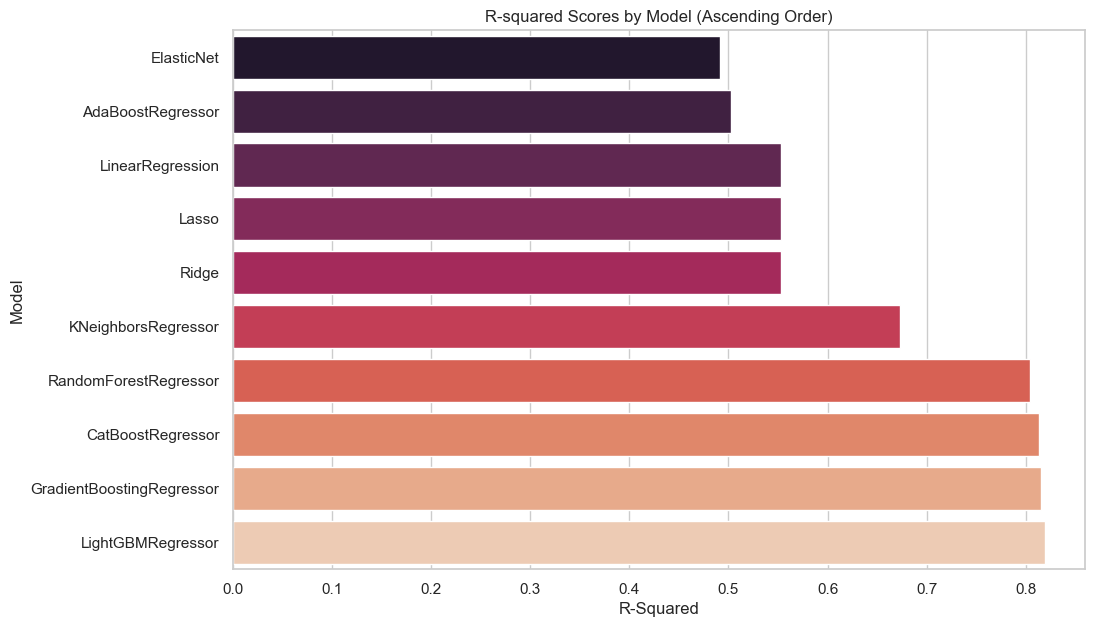

In [91]:
plt.figure(figsize=(11,7))
sns.set(style="whitegrid")
ax = sns.barplot(x="R-Squared", y='Model', data=results_df, palette="rocket")
ax.set(xlabel="R-Squared", ylabel="Model")
plt.title("R-squared Scores by Model (Ascending Order)")
plt.show()

In [100]:
results_df.reset_index(drop=True, inplace=True)

In [107]:
base_dir = "pretrained_models/"

for model_name, model_config in models.items():
    model_file_name = model_name + ".pkl"
    model_path = path.join(base_dir, model_file_name)
    joblib.dump(model_config['model'], model_path)